# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Abubakar Ibrahim**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [89]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation
from statsmodels.graphics.correlation import plot_corr  # To plot correlation heatmap
from sklearn.impute import KNNImputer                   # for Imputing missing values using k-Nearest Neighbors
from sklearn.preprocessing import StandardScaler        # For standardizing features

# Libraries for Model Building
from sklearn.model_selection import train_test_split    # To split the data into training and testing data
from sklearn.linear_model import LinearRegression       # For the LINEAR Model from Sklearn
from sklearn.linear_model import Ridge                  # For the RIDGE Regression module from sklearn
from sklearn.linear_model import Lasso                  # For the LASSO Model from Sklearn

# Libraries for calculating performance metrics
from sklearn import metrics

# Libraries to Save/Restore Models
import pickle

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load the data
df_train = pd.read_csv('df_train.csv')

# --> CONFIRM REMOVAL 
df_test = pd.read_csv('df_test.csv', index_col=0)         # index_col=0 to deal with unnamed column.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
# View loaded data
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
# View Column Names for possible White Spaces
df_train.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

**Observation:** 
* We’ll DROP the first column (“Unnamed”) since we don’t need it.
* Column Names has no White Spaces. OKAY.

In [5]:
# Drop Unnamed Column
df_train = df_train.drop('Unnamed: 0', axis=1)

In [6]:
# Confirm Dropped Column
df_train.head().T

,0,1,2,3,4
time,2015-01-01 03:00:00,2015-01-01 06:00:00,2015-01-01 09:00:00,2015-01-01 12:00:00,2015-01-01 15:00:00
Madrid_wind_speed,0.666667,0.333333,1.0,1.0,1.0
Valencia_wind_deg,level_5,level_10,level_9,level_8,level_7
Bilbao_rain_1h,0.0,0.0,0.0,0.0,0.0
Valencia_wind_speed,0.666667,1.666667,1.0,1.0,1.0
Seville_humidity,74.333333,78.333333,71.333333,65.333333,59.0
Madrid_humidity,64.0,64.666667,64.333333,56.333333,57.0
Bilbao_clouds_all,0.0,0.0,0.0,0.0,2.0
Bilbao_wind_speed,1.0,1.0,1.0,1.0,0.333333
Seville_clouds_all,0.0,0.0,0.0,0.0,0.0


**Observation:** 

- Dropped Column Confirmed. Okay
- High proportion of ZERO VALUE observed within some of our features; chances of skewing our data
    
    Resolution: These are valid imputations as they are observed within columns such as RAINFALL, SNOW, CLOUD and its very possible to record zero rain, snow or clouds. So we leave data as it is.
- Visually observing possible CATEGORICAL dataset.(SEE "Summary of dataset" below for Confirmation).
    
    Categorical variables really require special attention in regression analysis because, unlike numerical variables, they cannot by entered into the regression equation just as they are. Instead, they need to be recoded into numerical representation which can then be entered into the regression model.

**NEXT:** 

Lets see the Shape and Summary of our Dataset to gain further Insight about the Variables in our Dataset

In [7]:
#checking the shape of the dateset
print('The shape of the dataset : ', df_train.shape)
print(f'Shape of Test_Dataset {df_test.shape} :- Excludes load_shortfall_3h column') 

The shape of the dataset :  (8763, 48)
Shape of Test_Dataset (2920, 47) :- Excludes load_shortfall_3h column


Our Shape looks good;

- The TRAIN dataset; has 8763 rows and 48 columns
- The TEST dataset; has 2920 rows and 47 columns excluding our dependent variable "load_shortfall_3h"

In [8]:
# Summary of dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

**Observation:** 

1. Confirmed 3(three) of our Potential features having datatype OBJECT (CATEGORICAL)

       a. Valencia_wind_deg --> Covert to Numerical 
       b. Seville_pressure  --> Covert to Numerical 
       c. time              --> Covert to DateTime
       
       ENSURE: To convert the "time" column to DATETIME datatype before applying the Dummy Variable Encoding if not, The dummy variable encoding will treat it as a categorized dataset resulting to over 8843 columns which is not right.
       
2. Valencia_pressure  has   6695 non-null   Instead of 8763 (TOTAL MISSING VALUE = **2068**). See below for Confirmation

No. of missing values in Valencia_pressure: 2068


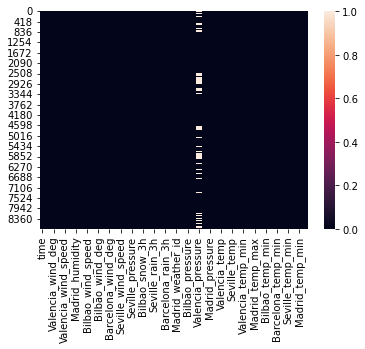

In [9]:
# Confirming & Visualizing our missing values
sns.heatmap(df_train.isnull())
print('No. of missing values in Valencia_pressure: ' + str(df_train['Valencia_pressure'].isnull().sum()))

The above heatmap shows how the spread of missing value in the Valencia_pressure Column
- The white region representing the missing values, between 0 to 8360 observation points
- The Dark region represening Actual values.


**NEXT:** 

We perform some indepth descriptive analysis

In [10]:
# look at data statistics
df_train.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


N/B: This covers only numerical variables

**Observation:** 

- Based on the MEANS and STANDARD DEVIATIONS of the different columns, we observed a high RANGE variation between our possible predictive features. we definately will have to consider STANDARDIZING our data. It also decreases the effect of the outliers, due to the scaling the magnitude differences, making our model become more robust

In [11]:
# look at data statistics of the categorical data
df_train.describe(include=['object'])

,time,Valencia_wind_deg,Seville_pressure
count,8763,8763,8763
unique,8763,10,25
top,2015-01-01 03:00:00,level_1,sp13
freq,1,1072,500


Valencia_wind_deg are Categorized between 
   * Level_1 to Level_10   
   
Seville_pressure are Categorized between
   * sp1  to  sp25

We will have to Dummy Encode this.

In [12]:
#Count duplicates  (REVIEW: NEEDED or NOT)
df_train.pivot_table(columns=['Seville_pressure'], aggfunc='size')

Seville_pressure
sp1     270
sp10    460
sp11    139
sp12    378
sp13    500
sp14    255
sp15    326
sp16    392
sp17    401
sp18    395
sp19    357
sp2     325
sp20    340
sp21    408
sp22    392
sp23    339
sp24    405
sp25    410
sp3     309
sp4     404
sp5     372
sp6     411
sp7     174
sp8     418
sp9     183
dtype: int64

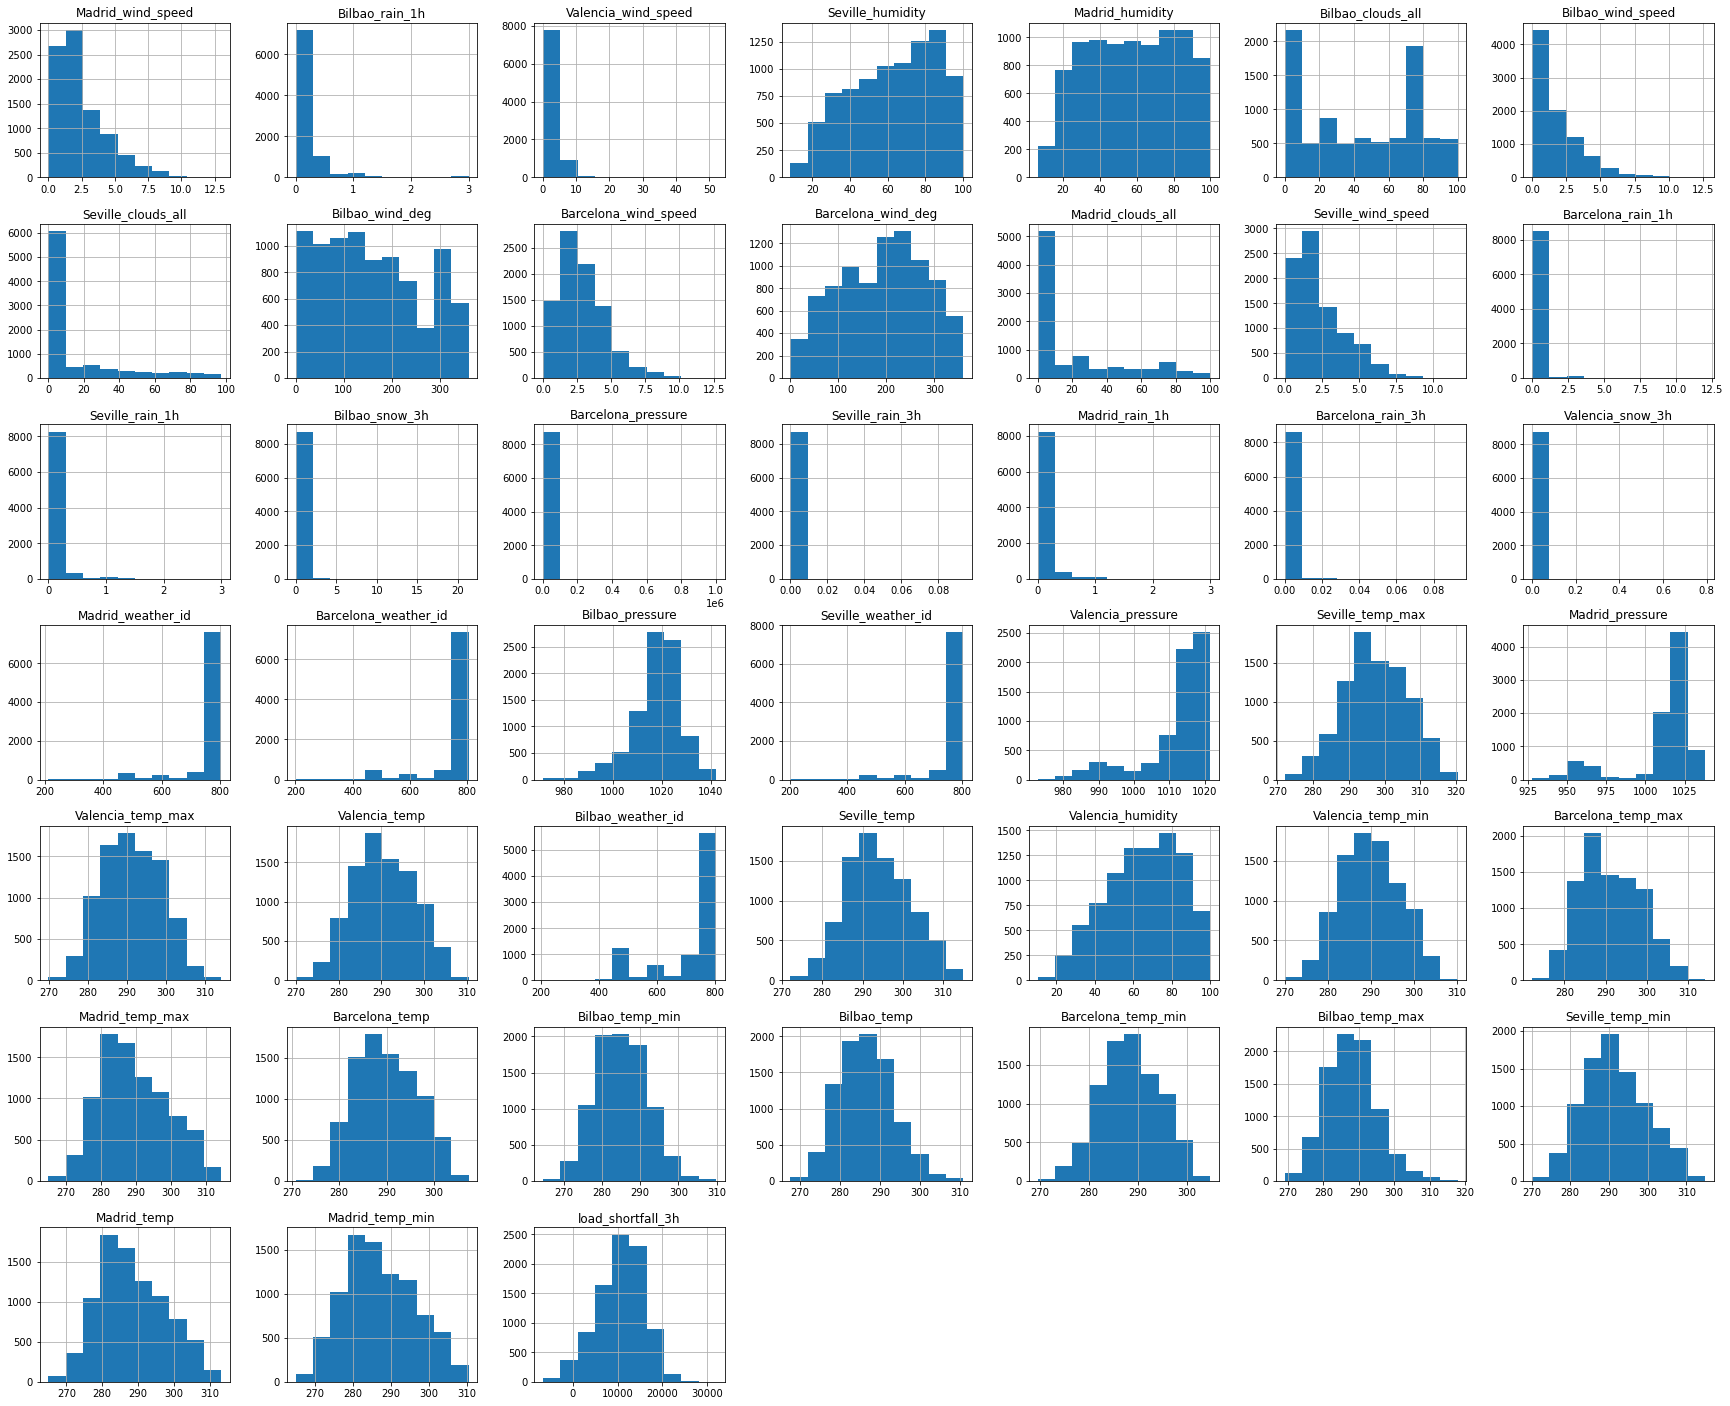

In [13]:
# plot relevant feature interactions 
pd.DataFrame.hist(df_train, figsize=[30,25])
plt.show()

**Observation:** 
The histograms displayed using the Matplotlib library, Aids us visualise all numerical features.

    - We can see the distribution of our data within each feature

(MORE DEDUCTION FROM THIS VISUALS  or is this Satisfactory?)

**NEXT:** 

We check for Correlation 

In [14]:
# evaluate correlation
df_train.corr('pearson') 

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,0.177393,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800
Barcelona_wind_speed,0.294640,0.069997,0.347966,-0.138625,-0.058518,0.094019,0.275317,0.136591,0.177393,1.000000,...,0.084209,0.116240,0.123403,0.120361,0.109268,0.109692,0.130367,0.089365,0.084679,-0.103633


**From Our correlation above and the Pearson Correlation Chat below we can deduce the Correlation Between our variables**

We are adopting the Pearson Correlation because it measures the linear relationship between features & Assumes that the features are normally distributed

<div align="left" style="width: 800px; text-align: left;">
<img src="https://github.com/Explore-AI/Pictures/blob/f3aeedd2c056ddd233301c7186063618c1041140/regression_analysis_notebook/pearson_corr.jpg?raw=True"
     alt="Pearson Correlation"
     style="padding-bottom=0.5em"
     width=800px/>
</div>
To make more sense of our correlation numbers; Let's visualize it in our HEATMAP; the correlation between variables. This will aid in our variable selection

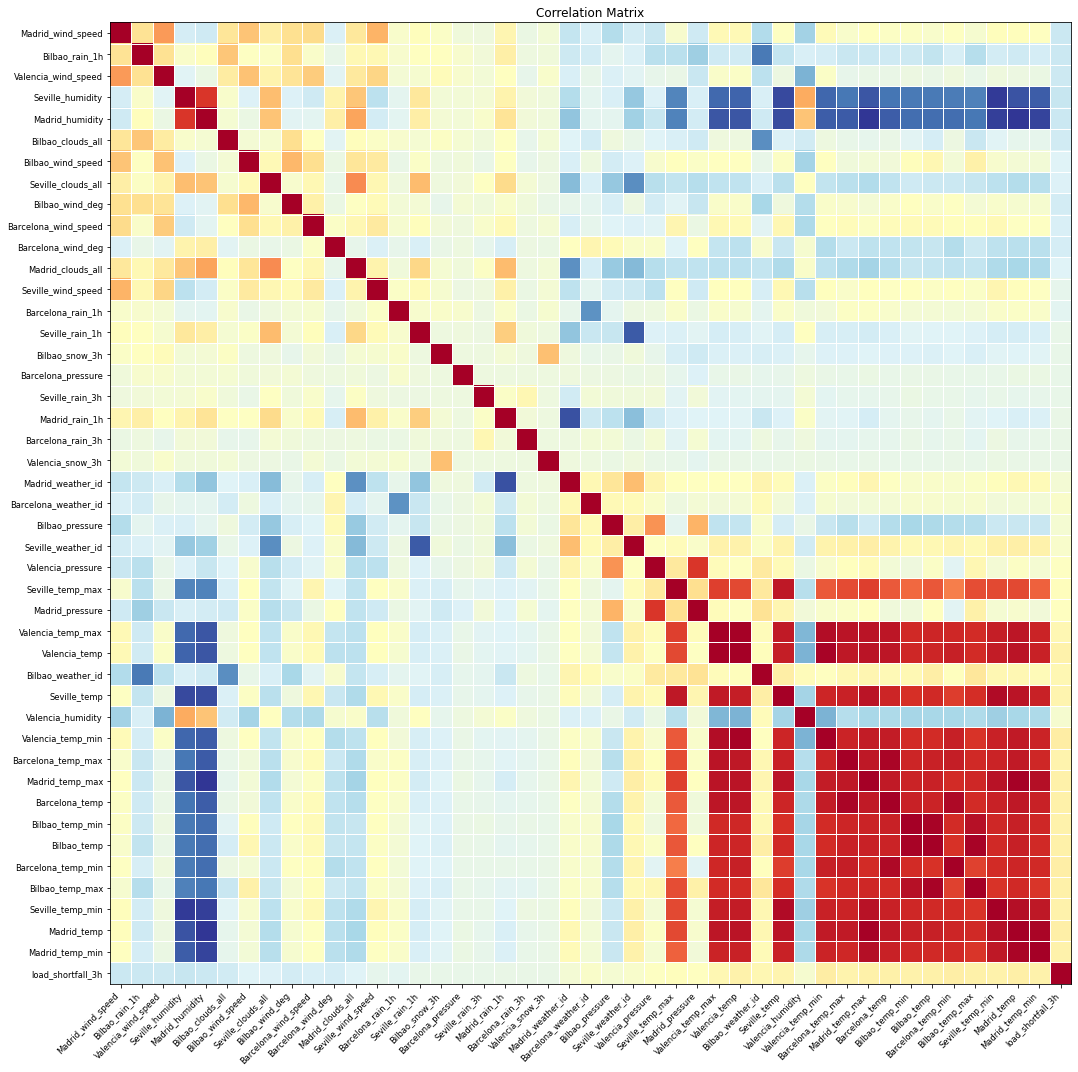

In [15]:
# Plotting the correlation heatmap
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_train.corr(), xnames = df_train.corr().columns, ax = ax);

**Obseervation:** We can deduce the following from our Heatmap;

 There is no need keeping two well correlated variables because they will be having the same effect on our response variable. If we use all of these variables, we're effectively working with superfluous or redundant information and Our model will also have collinearity issues:
- `Valencia_temp_max` and `Valencia_temp` are perfectly Positively correlated
- `Valencia_temp_min` and `Valencia_temp` are perfectly Positively correlated
- `Valencia_temp_max` and `Valencia_temp_min` are perfectly Positively correlated (maybe remove this 2)
- `Seville_temp_max` and `Seville_temp` are perfectly Positively correlated
- `Barcelona_temp_max` and `Barcelona_temp` are perfectly Positively correlated
- `Madrid_temp_min` and `Madrid_temp` are perfectly Positively correlated
- `Madrid_weather_id` and `madrid_rain_1h` are perfectly Negatively correlated (Check Why or Ignore)
- Negative correlation between `humidity` of `seville & madrid` against the `Temp across the cities` (CHECK)

Effecting this should drop considerable redundant features from our train data

In [16]:
# evaluating the correlation btw the features and the target variable
correlation = df_train.corr()
correlation['load_shortfall_3h'].sort_values(ascending=False)

load_shortfall_3h       1.000000
Valencia_temp_min       0.201863
Barcelona_temp_min      0.195984
Madrid_temp             0.186036
Barcelona_temp          0.182673
Madrid_temp_max         0.182548
Bilbao_temp_max         0.180934
Bilbao_temp             0.176411
Madrid_temp_min         0.174744
Seville_temp_min        0.174718
Valencia_temp           0.173225
Bilbao_temp_min         0.172920
Barcelona_temp_max      0.164734
Seville_temp            0.159343
Bilbao_weather_id       0.145875
Valencia_temp_max       0.144270
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Valencia_pressure       0.086022
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_weather_id       0.030868
Valencia_snow_3h       -0.021633
Barcelona_rain_3h      -0.024720
Madrid_rain_1h         -0.027159
Seville_rain_1h        -0.031572
Bilbao_snow_3h         -0.031721
Seville_rain_3h        -0.032945
Barcelona_

**Insight**

Features seem to have less effect on our response variables. We may consider `lagging our variables`

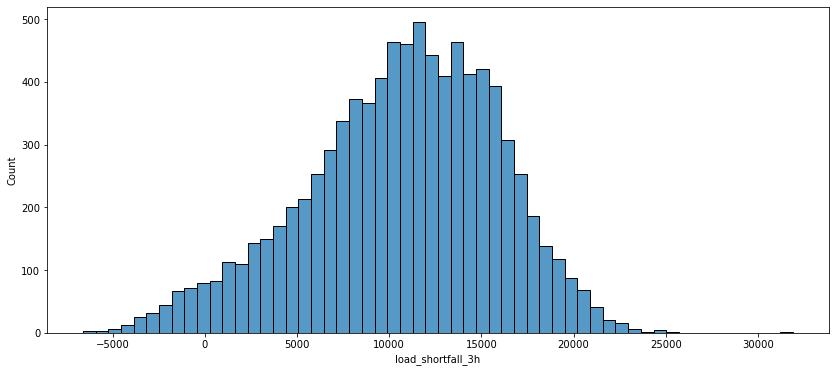

In [17]:
# have a look at feature distributions
fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(df_train['load_shortfall_3h'])
plt.show()

**Insight**

We can see our response variable is normally distributed (REVIEW / GET MORE INSIGHT)

***KEY NOTES*** 

ENSURE WE:
* Plot effect of time vs load_shortfall_3h; it's corrolation & it's visuals
* Create the new time features; Apply to check for correlation etc.


Let's Proceed to effecting the changes we've observed from our EDA in our Data Engineering section

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [18]:
# ENGINEERING EXISTING FEATURES
# First Convert the date column from object to datetime datatype
df_train['time'] = pd.to_datetime(df_train['time'])

NEXT we then Apply the dummy encoding to the remaining OBJECT datatype

In order to ensure that we don't assume an underlying relationship between the categories, we can call `pd.get_dummies` with the argument `drop_first=True` so that we only create n-1 columns for each variable with n categories (i.e. one variable/column with five categories will be transformed into four columns of 0's and 1's). 

In [19]:
# selecting and creating the dummy variables for the categorical features
categorical_var = df_train[['Valencia_wind_deg', 'Seville_pressure']]
categorical_var_dum = pd.get_dummies(categorical_var, drop_first=True) 
categorical_var_dum.head()

,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [67]:
df_dm = pd.get_dummies(df_train, drop_first=True)

# Again make sure that all the column names have underscores instead of whitespaces
#df_dm.columns = [col.replace(" ", "_") for col in df_dummies.columns]

# Reorder columns with the dependent variable (claim_amount) the last column
column_titles = [col for col in df_dm.columns if col !=
                 'load_shortfall_3h'] + ['load_shortfall_3h']
df_dm = df_dm.reindex(columns=column_titles)

df_dm.head()

,time,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,0,1,0,0,0,0,0,0,0,6715.666667
1,2015-01-01 06:00:00,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,0,1,0,0,0,0,0,0,0,4171.666667
2,2015-01-01 09:00:00,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,0,1,0,0,0,0,0,0,0,4274.666667
3,2015-01-01 12:00:00,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,0,1,0,0,0,0,0,0,0,5075.666667
4,2015-01-01 15:00:00,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,0,1,0,0,0,0,0,0,0,6620.666667


**NEXT**

Let's Deal with the missing values

In [68]:
# drop the TIME column with DateTime datatype
df = df_dm.drop(['time'], axis=1)

To Avoid

**TypeError:**  The DTypes <class 'numpy.dtype[float64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.


In [69]:
# handling missing values / features
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

Here we use the K-nearest neighbours (KNN) Algorithm to Impute the missing valuse, KNN calculates the mean of the neighbours based on the number of neighbours specified in side pramenter here we are using (5) as the number of neighbours

**NEXT:** 

As observed from our Descriptive Data Statistics, There is need to standardize our variables 

We will be using the StandarScaler to scale our dataframe

In [70]:
# First creating the features and target variables
X = df.drop('load_shortfall_3h', axis=1)
y = df['load_shortfall_3h']

In [72]:
# Create standardization object
scaler = StandardScaler()

# Save standardized features into new variable
X_scaled = scaler.fit_transform(X)

In [83]:
# Visualize Scaled Data
# convert the scaled predictor values into a dataframe
column_titles = [col for col in df.columns if col !=
                 'load_shortfall_3h']
df_x = df.reindex(columns=column_titles)
standardised = pd.DataFrame(X_scaled, columns=df_x.columns)
standardise.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,-2.420380,-1.354598,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892,-0.758601
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,-2.374370,-1.423738,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154,-1.246168
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,-1.726058,-1.267176,-1.489980,-1.671342,-1.124792,-1.821036,-1.570279,-1.680968,-1.574407,-1.226428
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,-0.783992,-0.983703,-0.579082,-0.775541,-0.821553,-0.961406,-0.762967,-0.698057,-0.576488,-1.072913
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,-0.908771,-0.864356,-0.412497,-0.611717,-0.693885,-0.804197,-0.748327,-0.828246,-0.708665,-0.776808


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [40]:
# We then split our data; 80% for training & 20% for testing
x_train, x_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=False)

In [90]:
# create one or more ML models

# Create linear model
lm = LinearRegression()

# Create ridge model
ridge = Ridge()

# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01) 
# Constant that multiplies the L1 term. Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square

In [91]:
# Train ML models
lm.fit(x_train, y_train)
ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78984862538.5458, tolerance: 18634441.99315214
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [93]:
# Make TRAIN set predictions for each model
train_lm = lm.predict(x_train)
train_ridge = ridge.predict(x_train)
train_lasso = lasso.predict(x_train)

In [94]:
# Make TEST set predictions for each model
test_lm = lm.predict(x_test)
test_ridge = ridge.predict(x_test)
test_lasso = lasso.predict(x_test)

In [97]:
# Dictionary of results
results_dict = {'Training MSE':
                    {
                        'linear Model': metrics.mean_squared_error(y_train, train_lm),
                        'Ridge': metrics.mean_squared_error(y_train, train_ridge),
                        "LASSO": metrics.mean_squared_error(y_train, train_lasso)
                    },
                    'Test MSE':
                    {
                        'linear Model': metrics.mean_squared_error(y_test, test_lm),
                        "Ridge": metrics.mean_squared_error(y_test, test_ridge),
                        "LASSO": metrics.mean_squared_error(y_test, test_lasso)
                    }
                }

In [100]:
results_dict

{'Training MSE': {'linear Model': 22759518.135879897,
  'Ridge': 22761807.66839744,
  'LASSO': 22762942.05863307},
 'Test MSE': {'linear Model': 24169354.61400287,
  'Ridge': 24144363.374838386,
  'LASSO': 24180415.932111297}}

In [99]:
# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)
results_df.T

,linear Model,Ridge,LASSO
Training MSE,2.275952e+07,2.276181e+07,2.276294e+07
Test MSE,2.416935e+07,2.414436e+07,2.418042e+07


In [41]:
# Create ridge model
ridge = Ridge()

In [42]:
#fitting the ML model
ridge.fit(x_train, y_train)

Ridge()

In [43]:
# Extract the model intercept value
b0 = float(ridge.intercept_)

In [44]:
b0

-0.15201023998340038

In [45]:
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, x_train.columns, columns=['Coefficient'])

In [46]:
coeff

,Coefficient
Madrid_wind_speed,-0.073741
Bilbao_rain_1h,-0.022858
Valencia_wind_speed,-0.018906
Seville_humidity,-0.175108
Madrid_humidity,-0.023202
...,...
Seville_pressure_sp5,-0.044783
Seville_pressure_sp6,-0.049778
Seville_pressure_sp7,-0.211351
Seville_pressure_sp8,-0.074923


In [47]:
# create one or more ML models

# Create linear model
lm = LinearRegression()
# Create ridge model
ridge = Ridge()

In [48]:
# Fit a basic linear model
lm.fit(x_train, y_train)
ridge.fit(x_train, y_train)

Ridge()

In [49]:
# evaluate one or more ML models
train_ridge = ridge.predict(x_train)
train_lm = lm.predict(x_train)

print('Ridge :', metrics.mean_squared_error(y_train, train_ridge))
print('linear Model :', metrics.mean_squared_error(y_train, train_lm))

Ridge : 0.837142929949268
linear Model : 0.837051860258435


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [50]:
# Compare model performance
test_ridge = ridge.predict(x_test)
test_lm = lm.predict(x_test)

print('Ridge :', metrics.mean_squared_error(y_test, test_ridge))
print('linear Model :', metrics.mean_squared_error(y_test, test_lm))

Ridge : 0.8871938200796787
linear Model : 0.8890351380186836


In [51]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [52]:
# discuss chosen methods logic